# Sympy で量子コンピュータの基礎を学ぶ

使うものを読み込むための呪文

In [10]:
from IPython.display import Image, display_png
from sympy import *
from sympy import Matrix,ImmutableMatrix,symbols,sqrt
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE
from sympy.physics.quantum.gate import UGate
from sympy.physics.quantum.gate import IdentityGate as _I
from sympy.printing.dot import dotprint
#from safe_gate import SafeUGate
import numpy as np
from sympy.physics.quantum.tensorproduct import TensorProduct


init_printing()

量子状態をブラッケット表示でシンボリックに表現できる

In [11]:
Qubit('0')

psi という変数にシンボリックに量子状態を代入する（量子状態を型とするような変数が使える）

In [12]:
psi = Qubit('0')
psi

In [13]:
psi = Qubit('000')
psi

ベクトルで表現するためには

In [14]:
represent(psi)

In [15]:
represent(Qubit('001'))

有名な量子演算はすでに定義されている。演算子を定義するときにはつねに何番目の量子ビットに作用するかを指定する。
例えば、0番目の量子ビットへのHadamardなら

In [16]:
H(0)

行列表示が欲しければ

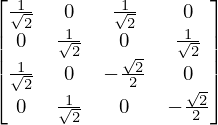

In [17]:
represent(H(1),nqubits=2)

nqubits = 1 の部分は、何個の量子ビットの空間で0番目の量子ビットへのHadamardを行列表示するかを選ぶ。 = 1だと1量子ビットしかいない場合のHadamardの行列表示なので2×2行列。

**0番目などの名前の付け方は右から順であることに注意!!!!!**

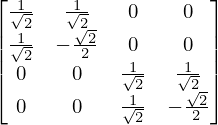

In [18]:
represent(H(0),nqubits=2)

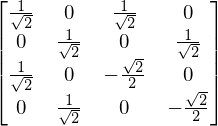

In [30]:
represent(H(1),nqubits=2)

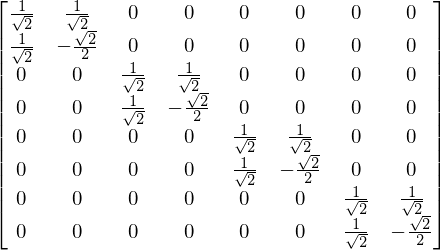

In [18]:
represent(H(0),nqubits=3)

量子状態に量子演算を作用させるときは qapply()をつかう。

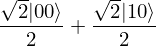

In [19]:
psi = Qubit('00')
psi = qapply(H(1)*psi)
psi

In [25]:
psi = Qubit('00')
psi

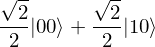

In [26]:
psi = qapply(H(1)*psi)
psi 

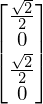

In [27]:
represent(psi)

事前に定義されている1量子ビット演算

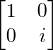

In [33]:
represent(S(0),nqubits=1)

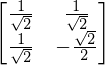

In [34]:
represent(H(0),nqubits=1)

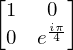

In [35]:
represent(T(0),nqubits=1)

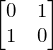

In [36]:
represent(X(0),nqubits=1)

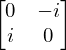

In [37]:
represent(Y(0),nqubits=1)

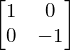

In [38]:
represent(Z(0),nqubits=1)

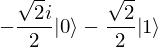

In [33]:
qapply(S(0)*Y(0)*X(0)*H(0)*Qubit('0'))

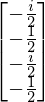

In [38]:
phi = qapply(S(0)*Y(0)*X(0)*H(0)*H(1)*Qubit('00'))
represent(phi,nqubits =2)

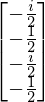

In [32]:
represent(S(0)*Y(0)*X(0)*H(0)*H(1)*Qubit('00'),nqubits = 2)

シンボリックに状態を定義することもできる。

In [20]:
a,b,c,d =symbols("alpha,beta,gamma,delta")
psi = a*Qubit("0")+b*Qubit("1")
represent(psi)

In [40]:
psi 

In [21]:
phi = c* Qubit('0')+d*Qubit('1')
represent(phi)

テンソル積は、TensorProduct( , )を使う

In [22]:
psiPhi=TensorProduct( psi, phi)
psiPhi

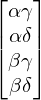

In [23]:
represent(psiPhi)

In [24]:
TensorProduct(psiPhi,psiPhi)

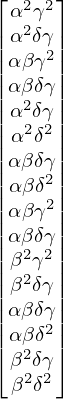

In [25]:
represent(TensorProduct(psiPhi,psiPhi))

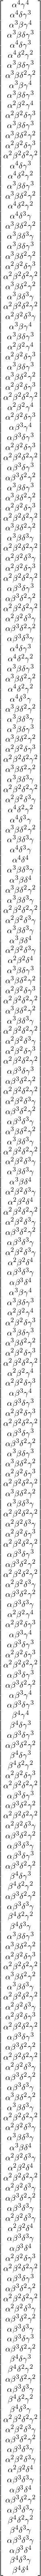

In [198]:
bigpsi = TensorProduct(psiPhi,psiPhi)
represent(TensorProduct(bigpsi,bigpsi))

symbolic に定義した状態に演算を作用

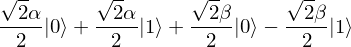

In [44]:
a,b,c,d =symbols("alpha,beta,gamma,delta")
psi = a*Qubit("0")+b*Qubit("1")
qapply(H(0)*psi)

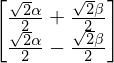

In [139]:
represent(qapply(H(0)*psi),nqubits=1)

自分で演算を定義することもできる

In [45]:
matMygate = np.array([[1,1],[1,-1]])/sqrt(2)
myGate = SafeUGate(target = 0, matrix = ImmutableMatrix(matMygate),name = "M")
qapply(myGate*Qubit('00'))
represent(myGate*H(1)*Qubit('00'),nqubits=2)

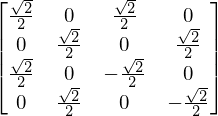

In [54]:
matMygate = np.array([[1,1],[1,-1]])/sqrt(2)
myGate = SafeUGate(target = 1, matrix = ImmutableMatrix(matMygate),name = "M")
represent(myGate,nqubits =2)

２量子ビット演算

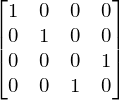

In [55]:
represent(CNOT(1,0),nqubits=2)

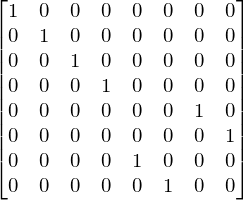

In [144]:
represent(CNOT(2,1),nqubits=3)

**qubitの番号づけが右からであることに注意**

確率を計算したい場合は、
measure_all() 

In [56]:
from sympy.physics.quantum.qubit import measure_all, measure_partial, measure_all_oneshot, measure_partial_oneshot

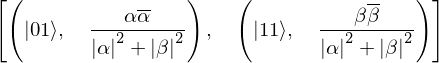

In [57]:
a,b,c,d =symbols("alpha,beta,gamma,delta")
psi =a*Qubit('0') + b*Qubit('1')
measure_all(psi)

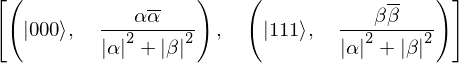

In [58]:
a,b,c,d =symbols("alpha,beta,gamma,delta")
psi =a*Qubit('000') + b*Qubit('111')
measure_all(psi)

In [175]:
1/np.sqrt(2)
r2

In [176]:
psi =0.7071*Qubit('0') +0.7071*Qubit('1')
measure_all(psi)

In [186]:
psi_5_qubit=qapply(H(0)*H(1)*H(2)*H(3)*H(4)*Qubit('00000'))

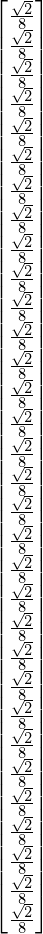

In [187]:
represent(psi_5_qubit)

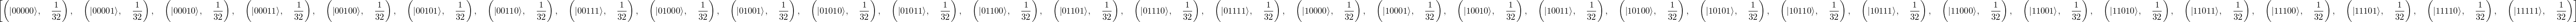

In [185]:
measure_all(psi_5_qubit)